#  Iris class prediction 

In [9]:
import pandas    
print('pandas version is: {}'.format(pandas.__version__))    
import numpy    
print('numpy version is:{}'.format(numpy.__version__))    
import seaborn as sns      
import sklearn      
import matplotlib.pyplot as plt
%matplotlib inline

pandas version is: 1.3.5
numpy version is:1.21.6


### Importing data set 

In [10]:
import pandas as pd  
iris=pd.read_csv('/content/iris_csv-210120-132620.csv')  

In [11]:
iris.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### analyse and visualize data set 

In [12]:
print(len(iris['class']))

150


In [13]:
for col in iris.columns:
    print(col)

sepallength
sepalwidth
petallength
petalwidth
class


In [14]:
print(iris.groupby('class').size()) 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


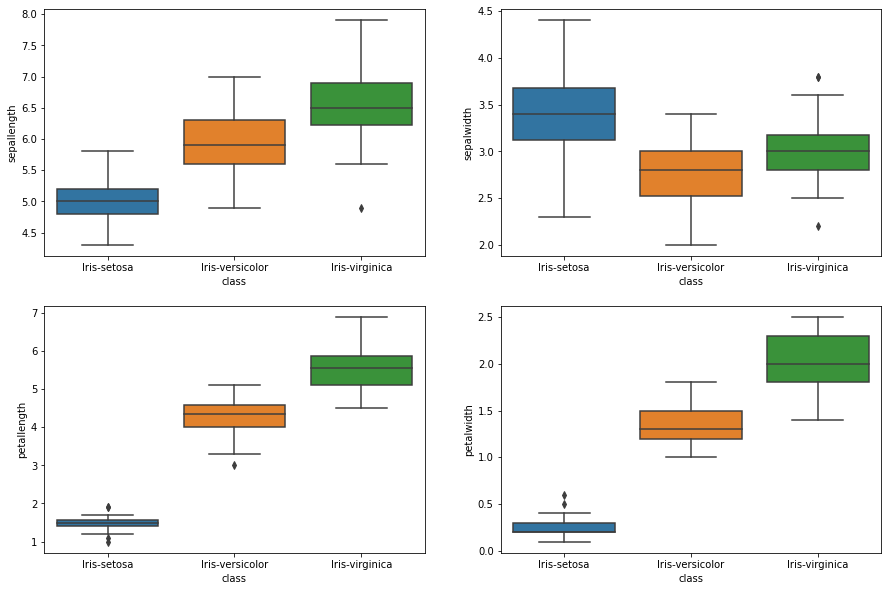

In [15]:
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='class',y='sepallength',data=iris)    
plt.subplot(2,2,2)    
sns.boxplot(x='class',y='sepalwidth',data=iris)    
plt.subplot(2,2,3)    
sns.boxplot(x='class',y='petallength',data=iris)    
plt.subplot(2,2,4)    
sns.boxplot(x='class',y='petalwidth',data=iris)    

In [16]:
# data cleaning 

In [17]:
iris.isnull().values.any()

False

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### splitting up of data 

In [19]:
from sklearn.model_selection import train_test_split
array = iris.values    
X = array[:,0:4]    
Y = array[:,4]      
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)    


### Apply algorithms and evaluate 

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
knn_y_train_pred=knn.predict(x_train)
knn_y_test_pred=knn.predict(x_test)
print(f'Train score:{accuracy_score(knn_y_train_pred,y_train)}')
print(f'Test score:{accuracy_score(knn_y_test_pred,y_test)}')

Train score:0.9619047619047619
Test score:0.9777777777777777


In [28]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, knn_y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, knn_y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, knn_y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.977778
Precision: 0.979630
Recall: 0.977778


In [31]:
print("Testing Classification report:")
print(classification_report(y_test,knn_y_test_pred))

Testing Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



ValueError: ignored

## SUPPORT VECTOR CLASSIFIER 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(max_iter=1000,gamma='auto')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred,y_test) , 2)*100
print("Accuracy :" ,acc_svc)

Accuracy : 98.0


## DECISION TREE CLASSIFIER  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier( random_state=0)
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy :" ,acc_decisiontree)

Accuracy : 98.0


## LOGISTIC REGRESSION 

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg)

Accuracy :  98.0
